In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

## Introduction

<p style='font-size:16px;line-height:24px;'>Here we will use a PCA'd set of data that shows bank transactions. From the data, there is a classifier that shows whether a transaction was a case of fraud or not. Most of the features have been rendered anonymous other than time, amount and the classifier.</p>

In [2]:
credit = pd.read_csv('creditcard.csv')

credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Explore the Data

In [4]:
# Not Fraud
compare = pd.DataFrame()

compare['Fraud'] = credit.Amount.loc[credit['Class']==1].describe()
compare['Not Fraud'] = credit.Amount.loc[credit['Class']==0].describe()

compare

,Fraud,Not Fraud
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


<p style='font-size:16px;line-height:24px;'>When viewing the shape of both the fraud and not fraud data, it is clear there is a massive class imbalance here. We will have to fix that to be able to predict accurately from it. </p>

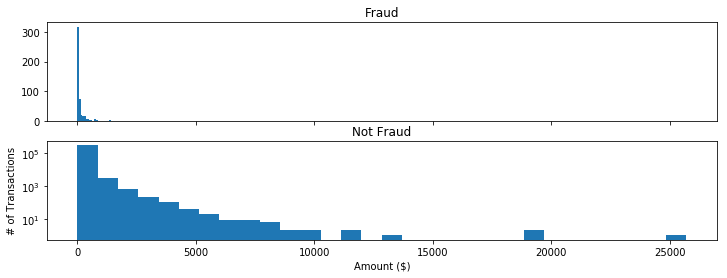

In [5]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
ax1.hist(credit.Amount[credit.Class == 1], bins=30)
ax1.set_title('Fraud')
ax2.hist(credit.Amount[credit.Class == 0], bins=30)
ax2.set_title('Not Fraud')

plt.xlabel('Amount ($)')
plt.ylabel('# of Transactions')
plt.yscale('log')
plt.show()

<p style='font-size:16px;line-height:24px;'>It also looks like most of our transactions come in at a relatively smaller amount. With the majority of the fraud transactions having being for a dollar amount of 0. Not what I would have expected, but there might be something more found in one of the PCA features that might be more able to explain the fraud.</p>

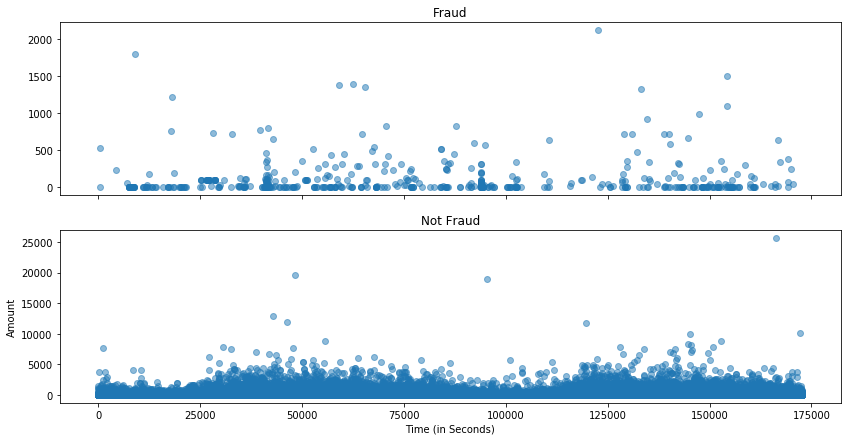

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14,7))
ax1.scatter(x="Time", y="Amount", data=credit.loc[credit['Class']==1], alpha=.5)
ax1.set_title('Fraud')
ax2.scatter(x="Time", y="Amount", data=credit.loc[credit['Class']==0], alpha=.5)
ax2.set_title('Not Fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<p style='font-size:16px;line-height:24px;'>Time seems to be pretty evenly distributed across fraud and not fraud. Not too much to learn from either of these graphs</p>

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


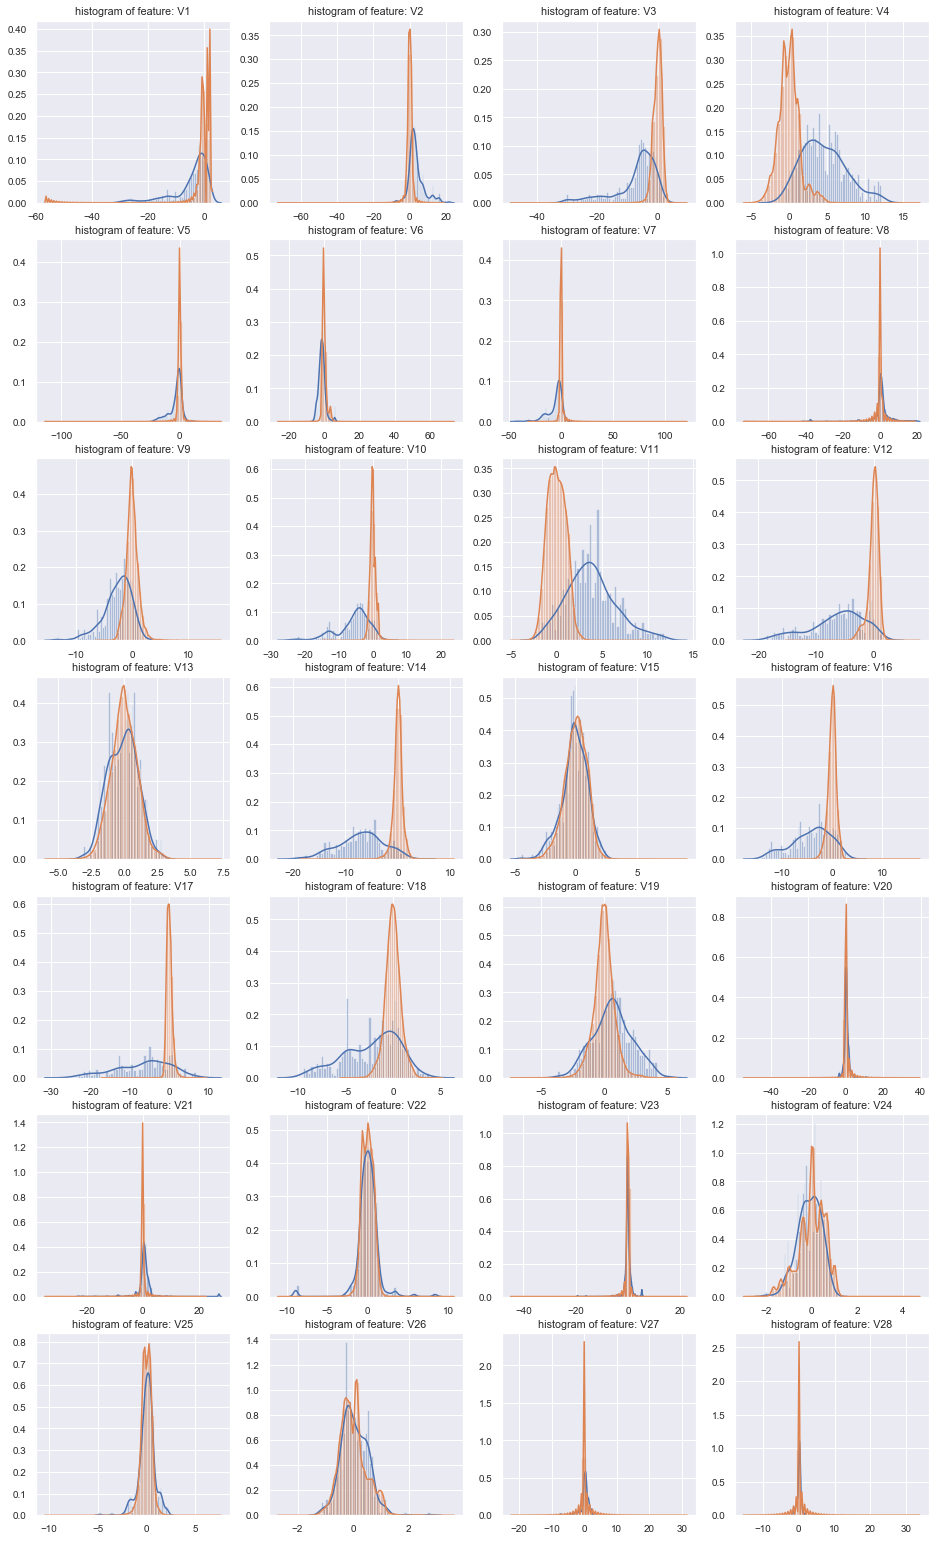

In [7]:
#Select only the anonymized features.
v_features = credit.iloc[:,1:29].columns

sns.set(font_scale=.9)
gs = gridspec.GridSpec(28, 4)
plt.figure(figsize=(16,28*4))
for i, cn in enumerate(credit[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(credit[cn][credit.Class == 1], bins=50)
    sns.distplot(credit[cn][credit.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

<p style='font-size:16px;line-height:24px;'>When viewing the histograms of each of the features and comparing the fraud and not fraud variable, it becomes clear that a few features are going to be much more valuable than others when it comes to predicting. Certain distributions are nearly the same, whereas in features like V17 and V18 the variation in distribution will allow us to distinguish the variable a bit more.</p>

### Let's Get Rid of the Class Imbalance

<p style='font-size:16px;line-height:24px;'>As we prepare to model, we should level out the class playing field</p>

In [7]:
# Make the fraud vs not fraud be evenly distributed

credit_s = credit.sample(frac=1)

fraud = credit_s.loc[credit['Class']==1]
not_fraud = credit_s.loc[credit['Class']==0][:984]

credit_dist = pd.concat([fraud, not_fraud])

credit_dist = credit_dist.sample(frac=1, random_state=40)

compare = pd.DataFrame()

compare['Fraud'] = credit_dist.Amount.loc[credit_dist['Class']==1].describe()
compare['Not Fraud'] = credit_dist.Amount.loc[credit_dist['Class']==0].describe()

compare

,Fraud,Not Fraud
count,492.000000,984.000000
mean,122.211321,91.841829
std,256.683288,279.839032
min,0.000000,0.000000
25%,1.000000,5.490000
50%,9.250000,20.330000
75%,105.890000,75.000000
max,2125.870000,5707.820000


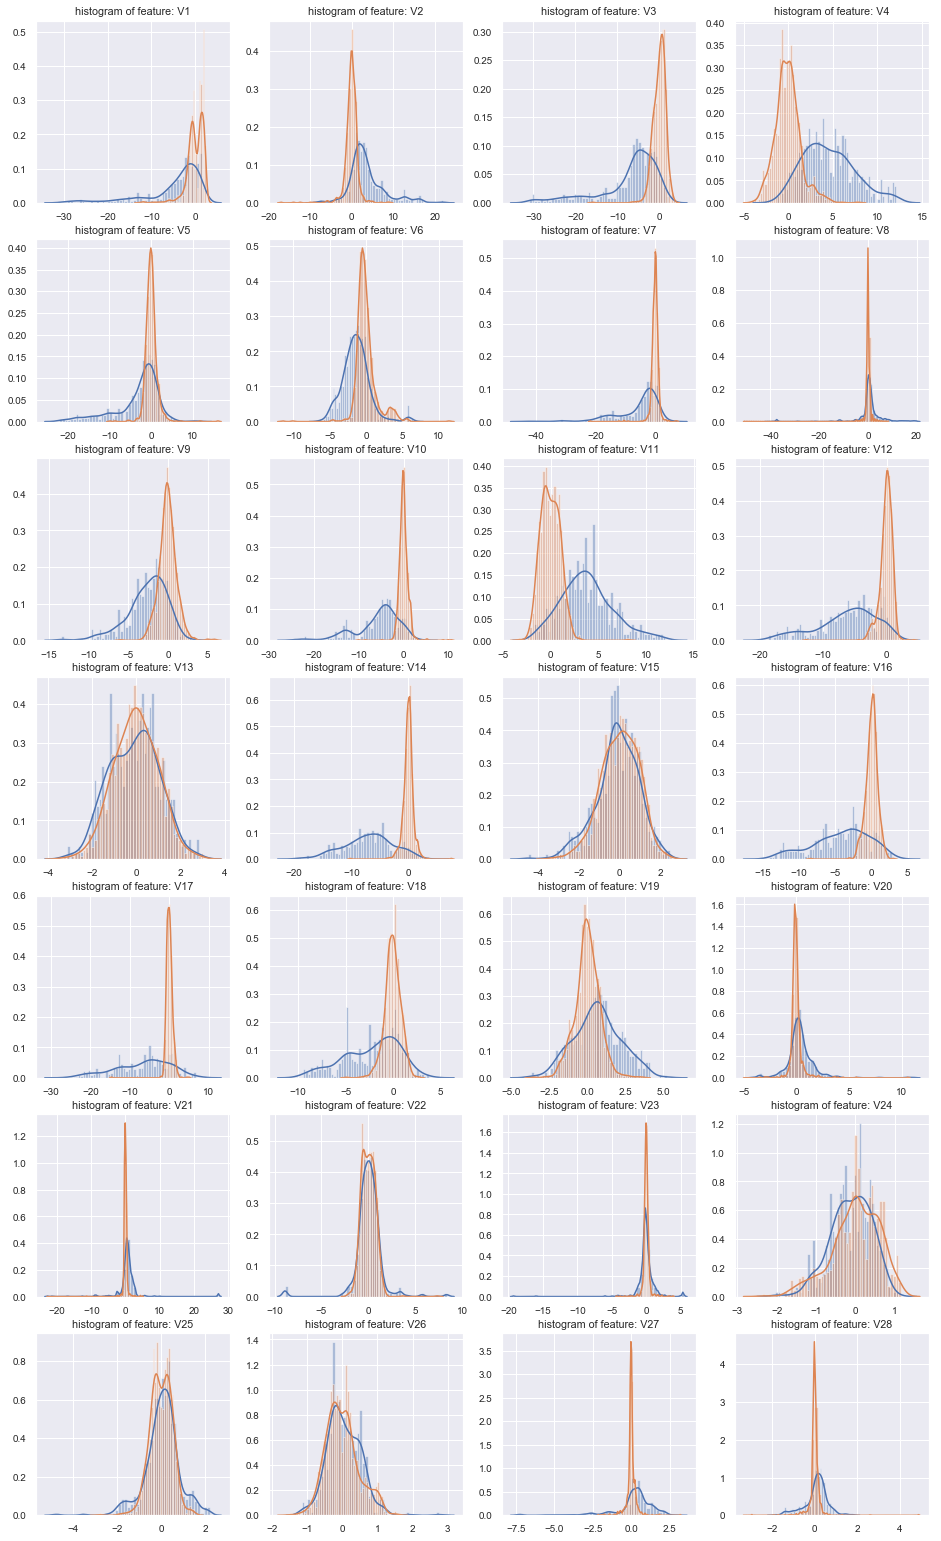

In [9]:
#Select only the anonymized features.
v_features = credit_dist.iloc[:,1:29].columns

sns.set(font_scale=.9)
gs = gridspec.GridSpec(28, 4)
plt.figure(figsize=(16,28*4))
for i, cn in enumerate(credit_dist[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(credit_dist[cn][credit_dist.Class == 1], bins=50)
    sns.distplot(credit_dist[cn][credit_dist.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

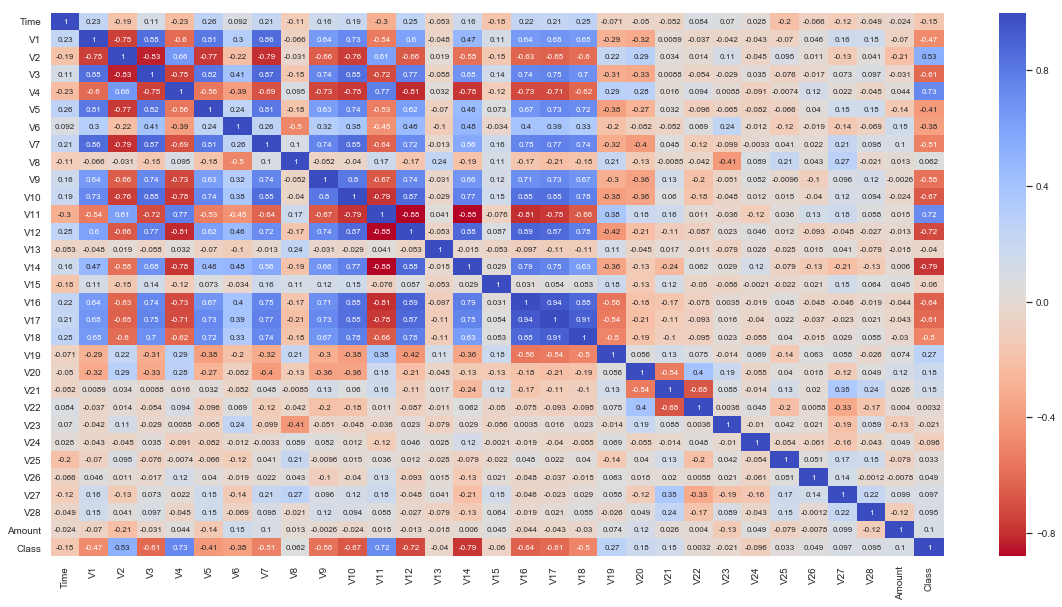

In [10]:
plt.figure(figsize=(20,10))
sample_corr = credit_dist.corr()
sns.heatmap(sample_corr, cmap='coolwarm_r', annot=True, annot_kws={'size':8})
ax2.set_title('Correlation Matrix', fontsize=14)
plt.show()

<p style='font-size:16px;line-height:24px;'>When we balance out the classes, it adds even more variation into our histograms. Also, taking a look at the correlation map, we begin to see what we saw in the graphs reflected. While there are very few positively correlated features, there are a fair amount that have a strong negative correlation.

• *Significant Positive Correlation to Class:* V2, V4, V11, & kind of V19, V20 & V21

• *Significant Negative Correlation to Class:* V1, V3, V5, V6, V7, V9, V10, V12, V14, V16, V17, & V18</p>

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif

X = credit_dist.drop(['Class'], 1)
y = credit_dist['Class']

selector=SelectKBest(score_func=f_classif,k=30)
selector.fit(X,y)
scores = pd.DataFrame()
scores["Attribute"] = X.columns
scores["F Score"] = selector.scores_
scores["P Value"] = selector.pvalues_
scores["Support"] = selector.get_support()

scores = scores.sort_values(by=['F Score'], ascending=False)

key_vals = scores.Attribute.head(20).values

scores

,Attribute,F Score,P Value,Support
14,V14,2364.059902,1.303010e-308,True
4,V4,1669.968930,9.906534e-245,True
12,V12,1594.994739,5.320493e-237,True
11,V11,1512.121998,3.115121e-228,True
10,V10,1204.186450,2.263608e-193,True
16,V16,1013.739757,9.694596e-170,True
3,V3,903.212064,3.530710e-155,True
17,V17,871.925174,6.210859e-151,True
9,V9,769.904549,1.100925e-136,True
7,V7,555.936323,1.466140e-104,True


# Modeling

<p style='font-size:16px;line-height:24px;'>As we move into beginning to model, we will run the dataset through these models: Logistic Regression, K Nearest Neighbors, Support Vector, & Random Forest.</p>

In [9]:
X = credit_dist.drop(['Class'], 1)
y = credit_dist['Class']

In [10]:
# to split a training and test sample
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

---

### Logistic Regression

In [11]:
# get rid of the warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9, max_iter = 150)
lr.fit(x_train, y_train)

# Set Up Predictor
ypred_lr = lr.predict(x_test)

In [12]:
# Grid Search CV for decision tree
from sklearn.model_selection import GridSearchCV

#GridSearchCV for random forest 
param_grid = {'C':[1e9,.1,.25,.5,.75,1,2,3,5], 'max_iter':[25,50,100,150,200,300,500], 'penalty':['l1','l2']}

# Start the grid search again
grid_DT = GridSearchCV(lr, param_grid, cv=5, verbose=3)

grid_DT.fit(x_train, y_train)

# summarize the results of the grid search
# View the accuracy score
print('Best score for data:', grid_DT.best_params_)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV] C=1000000000.0, max_iter=25, penalty=l1 .........................
[CV]  C=1000000000.0, max_iter=25, penalty=l1, score=0.9414414414414415, total=   0.0s
[CV] C=1000000000.0, max_iter=25, penalty=l1 .........................
[CV]  C=1000000000.0, max_iter=25, penalty=l1, score=0.9594594594594594, total=   0.0s
[CV] C=1000000000.0, max_iter=25, penalty=l1 .........................
[CV]  C=1000000000.0, max_iter=25, penalty=l1, score=0.9502262443438914, total=   0.0s
[CV] C=1000000000.0, max_iter=25, penalty=l1 .........................
[CV]  C=1000000000.0, max_iter=25, penalty=l1, score=0.9547511312217195, total=   0.0s
[CV] C=1000000000.0, max_iter=25, penalty=l1 .........................
[CV]  C=1000000000.0, max_iter=25, penalty=l1, score=0.9547511312217195, total=   0.0s
[CV] C=1000000000.0, max_iter=25, penalty=l2 .........................
[CV]  C=1000000000.0, max_iter=25, penalty=l2, score=0.9459459459459459, tot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1000000000.0, max_iter=100, penalty=l1, score=0.9594594594594594, total=   0.0s
[CV] C=1000000000.0, max_iter=100, penalty=l1 ........................
[CV]  C=1000000000.0, max_iter=100, penalty=l1, score=0.9502262443438914, total=   0.0s
[CV] C=1000000000.0, max_iter=100, penalty=l1 ........................
[CV]  C=1000000000.0, max_iter=100, penalty=l1, score=0.9547511312217195, total=   0.0s
[CV] C=1000000000.0, max_iter=100, penalty=l1 ........................
[CV]  C=1000000000.0, max_iter=100, penalty=l1, score=0.9502262443438914, total=   0.0s
[CV] C=1000000000.0, max_iter=100, penalty=l2 ........................
[CV]  C=1000000000.0, max_iter=100, penalty=l2, score=0.9459459459459459, total=   0.0s
[CV] C=1000000000.0, max_iter=100, penalty=l2 ........................
[CV]  C=1000000000.0, max_iter=100, penalty=l2, score=0.9414414414414415, total=   0.0s
[CV] C=1000000000.0, max_iter=100, penalty=l2 ........................
[CV]  C=1000000000.0, max_iter=100, penalty=l2

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.1, max_iter=50, penalty=l1, score=0.954954954954955, total=   0.0s
[CV] C=0.1, max_iter=50, penalty=l1 ..................................
[CV]  C=0.1, max_iter=50, penalty=l1, score=0.9594594594594594, total=   0.0s
[CV] C=0.1, max_iter=50, penalty=l1 ..................................
[CV]  C=0.1, max_iter=50, penalty=l1, score=0.9502262443438914, total=   0.0s
[CV] C=0.1, max_iter=50, penalty=l1 ..................................
[CV]  C=0.1, max_iter=50, penalty=l1, score=0.9457013574660633, total=   0.0s
[CV] C=0.1, max_iter=50, penalty=l1 ..................................
[CV]  C=0.1, max_iter=50, penalty=l1, score=0.9502262443438914, total=   0.0s
[CV] C=0.1, max_iter=50, penalty=l2 ..................................
[CV]  C=0.1, max_iter=50, penalty=l2, score=0.9459459459459459, total=   0.0s
[CV] C=0.1, max_iter=50, penalty=l2 ..................................
[CV]  C=0.1, max_iter=50, penalty=l2, score=0.9414414414414415, total=   0.0s
[CV] C=0.1, max_iter=50, pena

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.25, max_iter=50, penalty=l1, score=0.9547511312217195, total=   0.0s
[CV] C=0.25, max_iter=50, penalty=l1 .................................
[CV]  C=0.25, max_iter=50, penalty=l1, score=0.9457013574660633, total=   0.0s
[CV] C=0.25, max_iter=50, penalty=l1 .................................
[CV]  C=0.25, max_iter=50, penalty=l1, score=0.9547511312217195, total=   0.0s
[CV] C=0.25, max_iter=50, penalty=l2 .................................
[CV]  C=0.25, max_iter=50, penalty=l2, score=0.9459459459459459, total=   0.0s
[CV] C=0.25, max_iter=50, penalty=l2 .................................
[CV]  C=0.25, max_iter=50, penalty=l2, score=0.9414414414414415, total=   0.0s
[CV] C=0.25, max_iter=50, penalty=l2 .................................
[CV]  C=0.25, max_iter=50, penalty=l2, score=0.9411764705882353, total=   0.0s
[CV] C=0.25, max_iter=50, penalty=l2 .................................
[CV]  C=0.25, max_iter=50, penalty=l2, score=0.9457013574660633, total=   0.0s
[CV] C=0.25, max_iter

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.5, max_iter=50, penalty=l1, score=0.9502262443438914, total=   0.0s
[CV] C=0.5, max_iter=50, penalty=l1 ..................................
[CV]  C=0.5, max_iter=50, penalty=l1, score=0.9502262443438914, total=   0.0s
[CV] C=0.5, max_iter=50, penalty=l1 ..................................
[CV]  C=0.5, max_iter=50, penalty=l1, score=0.9547511312217195, total=   0.0s
[CV] C=0.5, max_iter=50, penalty=l2 ..................................
[CV]  C=0.5, max_iter=50, penalty=l2, score=0.9459459459459459, total=   0.0s
[CV] C=0.5, max_iter=50, penalty=l2 ..................................
[CV]  C=0.5, max_iter=50, penalty=l2, score=0.9414414414414415, total=   0.0s
[CV] C=0.5, max_iter=50, penalty=l2 ..................................
[CV]  C=0.5, max_iter=50, penalty=l2, score=0.9411764705882353, total=   0.0s
[CV] C=0.5, max_iter=50, penalty=l2 ..................................
[CV]  C=0.5, max_iter=50, penalty=l2, score=0.9457013574660633, total=   0.0s
[CV] C=0.5, max_iter=50, pen

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.75, max_iter=50, penalty=l2, score=0.9459459459459459, total=   0.0s
[CV] C=0.75, max_iter=50, penalty=l2 .................................
[CV]  C=0.75, max_iter=50, penalty=l2, score=0.9414414414414415, total=   0.0s
[CV] C=0.75, max_iter=50, penalty=l2 .................................
[CV]  C=0.75, max_iter=50, penalty=l2, score=0.9411764705882353, total=   0.0s
[CV] C=0.75, max_iter=50, penalty=l2 .................................
[CV]  C=0.75, max_iter=50, penalty=l2, score=0.9457013574660633, total=   0.0s
[CV] C=0.75, max_iter=50, penalty=l2 .................................
[CV]  C=0.75, max_iter=50, penalty=l2, score=0.9276018099547512, total=   0.0s
[CV] C=0.75, max_iter=100, penalty=l1 ................................
[CV]  C=0.75, max_iter=100, penalty=l1, score=0.9414414414414415, total=   0.0s
[CV] C=0.75, max_iter=100, penalty=l1 ................................
[CV]  C=0.75, max_iter=100, penalty=l1, score=0.9594594594594594, total=   0.0s
[CV] C=0.75, max_it

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1, max_iter=50, penalty=l2, score=0.9414414414414415, total=   0.0s
[CV] C=1, max_iter=50, penalty=l2 ....................................
[CV]  C=1, max_iter=50, penalty=l2, score=0.9411764705882353, total=   0.0s
[CV] C=1, max_iter=50, penalty=l2 ....................................
[CV]  C=1, max_iter=50, penalty=l2, score=0.9457013574660633, total=   0.0s
[CV] C=1, max_iter=50, penalty=l2 ....................................
[CV]  C=1, max_iter=50, penalty=l2, score=0.9276018099547512, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1 ...................................
[CV]  C=1, max_iter=100, penalty=l1, score=0.9414414414414415, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1 ...................................
[CV]  C=1, max_iter=100, penalty=l1, score=0.9594594594594594, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1 ...................................
[CV]  C=1, max_iter=100, penalty=l1, score=0.9502262443438914, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1 ....

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2, max_iter=50, penalty=l2, score=0.9459459459459459, total=   0.0s
[CV] C=2, max_iter=50, penalty=l2 ....................................
[CV]  C=2, max_iter=50, penalty=l2, score=0.9414414414414415, total=   0.0s
[CV] C=2, max_iter=50, penalty=l2 ....................................
[CV]  C=2, max_iter=50, penalty=l2, score=0.9411764705882353, total=   0.0s
[CV] C=2, max_iter=50, penalty=l2 ....................................
[CV]  C=2, max_iter=50, penalty=l2, score=0.9457013574660633, total=   0.0s
[CV] C=2, max_iter=50, penalty=l2 ....................................
[CV]  C=2, max_iter=50, penalty=l2, score=0.9276018099547512, total=   0.0s
[CV] C=2, max_iter=100, penalty=l1 ...................................
[CV]  C=2, max_iter=100, penalty=l1, score=0.9414414414414415, total=   0.0s
[CV] C=2, max_iter=100, penalty=l1 ...................................
[CV]  C=2, max_iter=100, penalty=l1, score=0.963963963963964, total=   0.0s
[CV] C=2, max_iter=100, penalty=l1 ......

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3, max_iter=50, penalty=l1, score=0.9502262443438914, total=   0.0s
[CV] C=3, max_iter=50, penalty=l1 ....................................
[CV]  C=3, max_iter=50, penalty=l1, score=0.9547511312217195, total=   0.0s
[CV] C=3, max_iter=50, penalty=l2 ....................................
[CV]  C=3, max_iter=50, penalty=l2, score=0.9459459459459459, total=   0.0s
[CV] C=3, max_iter=50, penalty=l2 ....................................
[CV]  C=3, max_iter=50, penalty=l2, score=0.9414414414414415, total=   0.0s
[CV] C=3, max_iter=50, penalty=l2 ....................................
[CV]  C=3, max_iter=50, penalty=l2, score=0.9411764705882353, total=   0.0s
[CV] C=3, max_iter=50, penalty=l2 ....................................
[CV]  C=3, max_iter=50, penalty=l2, score=0.9411764705882353, total=   0.0s
[CV] C=3, max_iter=50, penalty=l2 ....................................
[CV]  C=3, max_iter=50, penalty=l2, score=0.9276018099547512, total=   0.0s
[CV] C=3, max_iter=100, penalty=l1 .......

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=5, max_iter=50, penalty=l1, score=0.963963963963964, total=   0.0s
[CV] C=5, max_iter=50, penalty=l1 ....................................
[CV]  C=5, max_iter=50, penalty=l1, score=0.9502262443438914, total=   0.0s
[CV] C=5, max_iter=50, penalty=l1 ....................................
[CV]  C=5, max_iter=50, penalty=l1, score=0.9502262443438914, total=   0.0s
[CV] C=5, max_iter=50, penalty=l1 ....................................
[CV]  C=5, max_iter=50, penalty=l1, score=0.9547511312217195, total=   0.0s
[CV] C=5, max_iter=50, penalty=l2 ....................................
[CV]  C=5, max_iter=50, penalty=l2, score=0.9459459459459459, total=   0.0s
[CV] C=5, max_iter=50, penalty=l2 ....................................
[CV]  C=5, max_iter=50, penalty=l2, score=0.9414414414414415, total=   0.0s
[CV] C=5, max_iter=50, penalty=l2 ....................................
[CV]  C=5, max_iter=50, penalty=l2, score=0.9411764705882353, total=   0.0s
[CV] C=5, max_iter=50, penalty=l2 .........

[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    5.7s finished


In [14]:
lr = LogisticRegression(C=.25, max_iter = 25, penalty='l1')
lr.fit(x_train, y_train)

# Set Up Predictor
ypred_lr = lr.predict(x_test)

print('Train Percentage accuracy:')
print(lr.score(x_train, y_train))

print('\nTest Percentage accuracy:')
print(lr.score(x_test, y_test))

print('\nCross Validation:')
print(cross_val_score(lr, x_train, y_train, cv = 5))

from sklearn.metrics import classification_report
print('\nLogistic Regression:\n')
print(classification_report(y_test, ypred_lr))

Train Percentage accuracy:
0.9611562782294489

Test Percentage accuracy:
0.9566395663956639

Cross Validation:
[0.95495495 0.95945946 0.95475113 0.94570136 0.95475113]

Logistic Regression:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       242
           1       0.97      0.90      0.93       127

   micro avg       0.96      0.96      0.96       369
   macro avg       0.96      0.94      0.95       369
weighted avg       0.96      0.96      0.96       369



<p style='font-size:16px;line-height:24px;'>The Logistic Regression works pretty well on the data, a pretty consistent 95% accuracy across all of the folds is impressive. As you'll see later the logisitic regression is one of the highest performing models on this dataset and ultimately is probably the correct model for the problem. I think the nature of the data being a classification problem dealing with a lot of continuous variables plays into the logistic regression model's strengths.</p>

---

### K Nearest Neighbors

In [15]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
# Set Up Predictor
ypred_knn = knn.predict(x_test)

In [16]:
# Grid Search CV for decision tree
from sklearn.model_selection import GridSearchCV

#GridSearchCV for random forest 
param_grid = {'n_neighbors':[3,5,10,15,20,25,30,35]}

# Start the grid search again
grid_DT = GridSearchCV(knn, param_grid, cv=5, verbose=3)

grid_DT.fit(x_train, y_train)

# summarize the results of the grid search
# View the accuracy score
print('Best score for data:', grid_DT.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=0.7072072072072072, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=0.6936936936936937, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=0.6923076923076923, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=0.7330316742081447, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=0.7375565610859729, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.6711711711711712, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .......... n

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... n_neighbors=15, score=0.7149321266968326, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ......... n_neighbors=15, score=0.7239819004524887, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ......... n_neighbors=20, score=0.6846846846846847, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ......... n_neighbors=20, score=0.7387387387387387, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ......... n_neighbors=20, score=0.6877828054298643, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ......... n_neighbors=20, score=0.7330316742081447, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ......... n_neighbors=20, score=0.7149321266968326, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished


In [17]:
knn = neighbors.KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train, y_train)
# Set Up Predictor
ypred_knn = knn.predict(x_test)

print('\nTrain Percentage accuracy:')
print(knn.score(x_train, y_train))

print('\nTest Percentage accuracy:')
print(knn.score(x_test, y_test))

print('\nCross Validation:')
print(cross_val_score(knn, x_train, y_train, cv = 5))

print('\nLogistic Regression:\n')
print(classification_report(y_test, ypred_knn))


Train Percentage accuracy:
0.7262872628726287

Test Percentage accuracy:
0.7018970189701897

Cross Validation:
[0.67567568 0.74324324 0.71493213 0.74208145 0.7239819 ]

Logistic Regression:

              precision    recall  f1-score   support

           0       0.73      0.88      0.79       242
           1       0.61      0.37      0.46       127

   micro avg       0.70      0.70      0.70       369
   macro avg       0.67      0.62      0.63       369
weighted avg       0.69      0.70      0.68       369



<p style='font-size:16px;line-height:24px;'>Even after performing the gridsearchCV to find the correct parameters, the KNN classifier doesn't perform nearly well enough on the data. The cross validation scores are decent, but have a bit more variation among them then I would prefer. Then the low recall score on the classifier is also very disappointing. Ultimately I think the large class imbalance on the full dataset makes kNN a bad candidate for this data.</p>

---

### Support Vector Machines

In [18]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')
svc.fit(x_train, y_train)
ypred_svc = svc.predict(x_test)

In [19]:
print('\nTrain Percentage accuracy:')
print(svc.score(x_train, y_train))

print('\nTest Percentage accuracy:')
print(svc.score(x_test, y_test))

print('\nCross Validation:')
print(cross_val_score(svc, x_train, y_train, cv = 5))

print('\nLogistic Regression:\n')
print(classification_report(y_test, ypred_svc))


Train Percentage accuracy:
0.9177958446251129

Test Percentage accuracy:
0.9105691056910569

Cross Validation:
[0.91441441 0.92792793 0.91402715 0.8959276  0.90497738]

Logistic Regression:

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       242
           1       0.98      0.76      0.85       127

   micro avg       0.91      0.91      0.91       369
   macro avg       0.93      0.87      0.89       369
weighted avg       0.92      0.91      0.91       369



<p style='font-size:16px;line-height:24px;'>Support Vector machines performed pretty well on the data. The cross val scores are all good and do not have too much variance in them and the train and test accuracies are also both good and show the model isn't overfitting. The recall score for the outcome variable is the one place where the model is lacking though. Ultimately the reason why this isn't the right model for the job is because it takes too long to run and even after all of that doesn't perform as well as the logistic regression.</p>

---

### Random Forest

In [20]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=100, max_depth=4)
rfc.fit(x_train, y_train)

ypred_rfc = rfc.predict(x_test)

In [21]:
# Grid Search CV for decision tree
from sklearn.model_selection import GridSearchCV

#GridSearchCV for random forest 
param_grid = {'n_estimators':[10,25,50,75,100,125,150,175,200,300,400,500], 'max_depth':[2,4,6,8,10]}

# Start the grid search again
grid_DT = GridSearchCV(rfc, param_grid, cv=10, verbose=3)

grid_DT.fit(x_train, y_train)

# summarize the results of the grid search
# View the accuracy score
print('Best score for data:', grid_DT.best_params_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] max_depth=2, n_estimators=10 ....................................
[CV]  max_depth=2, n_estimators=10, score=0.9553571428571429, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV]  max_depth=2, n_estimators=10, score=0.9464285714285714, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV]  max_depth=2, n_estimators=10, score=0.954954954954955, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV]  max_depth=2, n_estimators=10, score=0.9459459459459459, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV]  max_depth=2, n_estimators=10, score=0.9279279279279279, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV]  max_depth=2, n_estimators=10, score=0.9545454545454546, total=   0.0s
[CV] max_depth=2, n_estimators=10 ......................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=2, n_estimators=25, score=0.9553571428571429, total=   0.0s
[CV] max_depth=2, n_estimators=25 ....................................
[CV]  max_depth=2, n_estimators=25, score=0.9464285714285714, total=   0.0s
[CV] max_depth=2, n_estimators=25 ....................................
[CV]  max_depth=2, n_estimators=25, score=0.954954954954955, total=   0.0s
[CV] max_depth=2, n_estimators=25 ....................................
[CV]  max_depth=2, n_estimators=25, score=0.954954954954955, total=   0.0s
[CV] max_depth=2, n_estimators=25 ....................................
[CV]  max_depth=2, n_estimators=25, score=0.9009009009009009, total=   0.0s
[CV] max_depth=2, n_estimators=25 ....................................
[CV]  max_depth=2, n_estimators=25, score=0.9636363636363636, total=   0.0s
[CV] max_depth=2, n_estimators=25 ....................................
[CV]  max_depth=2, n_estimators=25, score=0.9454545454545454, total=   0.0s
[CV] max_depth=2, n_estimators=25 ..........

[CV]  max_depth=2, n_estimators=150, score=0.9454545454545454, total=   0.2s
[CV] max_depth=2, n_estimators=150 ...................................
[CV]  max_depth=2, n_estimators=150, score=0.9181818181818182, total=   0.2s
[CV] max_depth=2, n_estimators=150 ...................................
[CV]  max_depth=2, n_estimators=150, score=0.9818181818181818, total=   0.2s
[CV] max_depth=2, n_estimators=175 ...................................
[CV]  max_depth=2, n_estimators=175, score=0.9553571428571429, total=   0.2s
[CV] max_depth=2, n_estimators=175 ...................................
[CV]  max_depth=2, n_estimators=175, score=0.9464285714285714, total=   0.2s
[CV] max_depth=2, n_estimators=175 ...................................
[CV]  max_depth=2, n_estimators=175, score=0.954954954954955, total=   0.2s
[CV] max_depth=2, n_estimators=175 ...................................
[CV]  max_depth=2, n_estimators=175, score=0.9459459459459459, total=   0.2s
[CV] max_depth=2, n_estimators=175 .

[CV]  max_depth=4, n_estimators=10, score=0.990909090909091, total=   0.0s
[CV] max_depth=4, n_estimators=25 ....................................
[CV]  max_depth=4, n_estimators=25, score=0.9553571428571429, total=   0.0s
[CV] max_depth=4, n_estimators=25 ....................................
[CV]  max_depth=4, n_estimators=25, score=0.9464285714285714, total=   0.0s
[CV] max_depth=4, n_estimators=25 ....................................
[CV]  max_depth=4, n_estimators=25, score=0.954954954954955, total=   0.0s
[CV] max_depth=4, n_estimators=25 ....................................
[CV]  max_depth=4, n_estimators=25, score=0.963963963963964, total=   0.0s
[CV] max_depth=4, n_estimators=25 ....................................
[CV]  max_depth=4, n_estimators=25, score=0.9279279279279279, total=   0.0s
[CV] max_depth=4, n_estimators=25 ....................................
[CV]  max_depth=4, n_estimators=25, score=0.9727272727272728, total=   0.0s
[CV] max_depth=4, n_estimators=25 ...........

[CV]  max_depth=4, n_estimators=150, score=0.9636363636363636, total=   0.2s
[CV] max_depth=4, n_estimators=150 ...................................
[CV]  max_depth=4, n_estimators=150, score=0.9454545454545454, total=   0.2s
[CV] max_depth=4, n_estimators=150 ...................................
[CV]  max_depth=4, n_estimators=150, score=0.9636363636363636, total=   0.2s
[CV] max_depth=4, n_estimators=150 ...................................
[CV]  max_depth=4, n_estimators=150, score=0.9181818181818182, total=   0.2s
[CV] max_depth=4, n_estimators=150 ...................................
[CV]  max_depth=4, n_estimators=150, score=0.990909090909091, total=   0.2s
[CV] max_depth=4, n_estimators=175 ...................................
[CV]  max_depth=4, n_estimators=175, score=0.9553571428571429, total=   0.3s
[CV] max_depth=4, n_estimators=175 ...................................
[CV]  max_depth=4, n_estimators=175, score=0.9464285714285714, total=   0.3s
[CV] max_depth=4, n_estimators=175 .

[CV]  max_depth=6, n_estimators=10, score=0.9272727272727272, total=   0.0s
[CV] max_depth=6, n_estimators=10 ....................................
[CV]  max_depth=6, n_estimators=10, score=0.9727272727272728, total=   0.0s
[CV] max_depth=6, n_estimators=25 ....................................
[CV]  max_depth=6, n_estimators=25, score=0.9553571428571429, total=   0.1s
[CV] max_depth=6, n_estimators=25 ....................................
[CV]  max_depth=6, n_estimators=25, score=0.9464285714285714, total=   0.1s
[CV] max_depth=6, n_estimators=25 ....................................
[CV]  max_depth=6, n_estimators=25, score=0.954954954954955, total=   0.1s
[CV] max_depth=6, n_estimators=25 ....................................
[CV]  max_depth=6, n_estimators=25, score=0.954954954954955, total=   0.1s
[CV] max_depth=6, n_estimators=25 ....................................
[CV]  max_depth=6, n_estimators=25, score=0.918918918918919, total=   0.1s
[CV] max_depth=6, n_estimators=25 ...........

[CV]  max_depth=6, n_estimators=150, score=0.918918918918919, total=   0.3s
[CV] max_depth=6, n_estimators=150 ...................................
[CV]  max_depth=6, n_estimators=150, score=0.9727272727272728, total=   0.3s
[CV] max_depth=6, n_estimators=150 ...................................
[CV]  max_depth=6, n_estimators=150, score=0.9454545454545454, total=   0.3s
[CV] max_depth=6, n_estimators=150 ...................................
[CV]  max_depth=6, n_estimators=150, score=0.9545454545454546, total=   0.3s
[CV] max_depth=6, n_estimators=150 ...................................
[CV]  max_depth=6, n_estimators=150, score=0.9272727272727272, total=   0.3s
[CV] max_depth=6, n_estimators=150 ...................................
[CV]  max_depth=6, n_estimators=150, score=0.990909090909091, total=   0.3s
[CV] max_depth=6, n_estimators=175 ...................................
[CV]  max_depth=6, n_estimators=175, score=0.9553571428571429, total=   0.3s
[CV] max_depth=6, n_estimators=175 ..

[CV]  max_depth=8, n_estimators=10, score=0.9636363636363636, total=   0.0s
[CV] max_depth=8, n_estimators=10 ....................................
[CV]  max_depth=8, n_estimators=10, score=0.9272727272727272, total=   0.0s
[CV] max_depth=8, n_estimators=10 ....................................
[CV]  max_depth=8, n_estimators=10, score=0.9727272727272728, total=   0.0s
[CV] max_depth=8, n_estimators=25 ....................................
[CV]  max_depth=8, n_estimators=25, score=0.9553571428571429, total=   0.1s
[CV] max_depth=8, n_estimators=25 ....................................
[CV]  max_depth=8, n_estimators=25, score=0.9464285714285714, total=   0.1s
[CV] max_depth=8, n_estimators=25 ....................................
[CV]  max_depth=8, n_estimators=25, score=0.972972972972973, total=   0.1s
[CV] max_depth=8, n_estimators=25 ....................................
[CV]  max_depth=8, n_estimators=25, score=0.9459459459459459, total=   0.1s
[CV] max_depth=8, n_estimators=25 .........

[CV]  max_depth=8, n_estimators=150, score=0.954954954954955, total=   0.3s
[CV] max_depth=8, n_estimators=150 ...................................
[CV]  max_depth=8, n_estimators=150, score=0.9279279279279279, total=   0.3s
[CV] max_depth=8, n_estimators=150 ...................................
[CV]  max_depth=8, n_estimators=150, score=0.9727272727272728, total=   0.3s
[CV] max_depth=8, n_estimators=150 ...................................
[CV]  max_depth=8, n_estimators=150, score=0.9545454545454546, total=   0.3s
[CV] max_depth=8, n_estimators=150 ...................................
[CV]  max_depth=8, n_estimators=150, score=0.9454545454545454, total=   0.3s
[CV] max_depth=8, n_estimators=150 ...................................
[CV]  max_depth=8, n_estimators=150, score=0.9181818181818182, total=   0.3s
[CV] max_depth=8, n_estimators=150 ...................................
[CV]  max_depth=8, n_estimators=150, score=0.990909090909091, total=   0.3s
[CV] max_depth=8, n_estimators=175 ..

[CV]  max_depth=8, n_estimators=500, score=0.990909090909091, total=   1.1s
[CV] max_depth=10, n_estimators=10 ...................................
[CV]  max_depth=10, n_estimators=10, score=0.9553571428571429, total=   0.0s
[CV] max_depth=10, n_estimators=10 ...................................
[CV]  max_depth=10, n_estimators=10, score=0.9464285714285714, total=   0.0s
[CV] max_depth=10, n_estimators=10 ...................................
[CV]  max_depth=10, n_estimators=10, score=0.963963963963964, total=   0.0s
[CV] max_depth=10, n_estimators=10 ...................................
[CV]  max_depth=10, n_estimators=10, score=0.9459459459459459, total=   0.0s
[CV] max_depth=10, n_estimators=10 ...................................
[CV]  max_depth=10, n_estimators=10, score=0.9369369369369369, total=   0.0s
[CV] max_depth=10, n_estimators=10 ...................................
[CV]  max_depth=10, n_estimators=10, score=0.9636363636363636, total=   0.0s
[CV] max_depth=10, n_estimators=10 ..

[CV]  max_depth=10, n_estimators=125, score=0.9636363636363636, total=   0.3s
[CV] max_depth=10, n_estimators=125 ..................................
[CV]  max_depth=10, n_estimators=125, score=0.9545454545454546, total=   0.3s
[CV] max_depth=10, n_estimators=125 ..................................
[CV]  max_depth=10, n_estimators=125, score=0.9545454545454546, total=   0.3s
[CV] max_depth=10, n_estimators=125 ..................................
[CV]  max_depth=10, n_estimators=125, score=0.9272727272727272, total=   0.3s
[CV] max_depth=10, n_estimators=125 ..................................
[CV]  max_depth=10, n_estimators=125, score=0.990909090909091, total=   0.3s
[CV] max_depth=10, n_estimators=150 ..................................
[CV]  max_depth=10, n_estimators=150, score=0.9642857142857143, total=   0.4s
[CV] max_depth=10, n_estimators=150 ..................................
[CV]  max_depth=10, n_estimators=150, score=0.9464285714285714, total=   0.4s
[CV] max_depth=10, n_estimato

[CV]  max_depth=10, n_estimators=500, score=0.9464285714285714, total=   1.2s
[CV] max_depth=10, n_estimators=500 ..................................
[CV]  max_depth=10, n_estimators=500, score=0.963963963963964, total=   1.2s
[CV] max_depth=10, n_estimators=500 ..................................
[CV]  max_depth=10, n_estimators=500, score=0.9459459459459459, total=   1.2s
[CV] max_depth=10, n_estimators=500 ..................................
[CV]  max_depth=10, n_estimators=500, score=0.9279279279279279, total=   1.2s
[CV] max_depth=10, n_estimators=500 ..................................
[CV]  max_depth=10, n_estimators=500, score=0.9636363636363636, total=   1.2s
[CV] max_depth=10, n_estimators=500 ..................................
[CV]  max_depth=10, n_estimators=500, score=0.9545454545454546, total=   1.2s
[CV] max_depth=10, n_estimators=500 ..................................
[CV]  max_depth=10, n_estimators=500, score=0.9454545454545454, total=   1.2s
[CV] max_depth=10, n_estimato

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  3.5min finished


Best score for data: {'max_depth': 10, 'n_estimators': 100}


In [22]:
rfc = ensemble.RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(x_train, y_train)

ypred_rfc = rfc.predict(x_test)

print('\nTrain Percentage accuracy:')
print(rfc.score(x_train, y_train))

print('\nTest Percentage accuracy:')
print(rfc.score(x_test, y_test))

print('\nCross Validation:')
print(cross_val_score(rfc, x_train, y_train, cv = 5))

print('\nClassification Report:')
print(classification_report(y_test, ypred_rfc))


Train Percentage accuracy:
0.9846431797651309

Test Percentage accuracy:
0.9376693766937669

Cross Validation:
[0.95495495 0.96396396 0.94570136 0.95475113 0.9638009 ]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       242
           1       0.94      0.87      0.91       127

   micro avg       0.94      0.94      0.94       369
   macro avg       0.94      0.92      0.93       369
weighted avg       0.94      0.94      0.94       369



<p style='font-size:16px;line-height:24px;'>Random Forest is one of the top performers of the bunch for sure. Performing at nearly the levels that logistic regression did. It's cross validation scores are actually even better but it falls a bit short of the logistic regression in that key recall score for the outcome variable. Also, the difference between the test score and the train score might show a slight bit of overfitting. Ultimately I think logistic regression is probably a better bet for this problem but random forest could also be a very viable option.</p>

---

### Decision Tree with Gradient Boosting

In [23]:
clf = ensemble.GradientBoostingClassifier()
clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [24]:
#GridSearchCV for random forest 
param_grid = {'n_estimators':[50,100,150,200,300,500,750,1000], 'max_depth':[2,4,6],
              'loss':['deviance', 'exponential']}

# Start the grid search again
grid_DT = GridSearchCV(clf, param_grid, cv=5, verbose=3)

grid_DT.fit(x_train, y_train)

# summarize the results of the grid search
# View the accuracy score
print('Best score for data:', grid_DT.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] loss=deviance, max_depth=2, n_estimators=50 .....................
[CV]  loss=deviance, max_depth=2, n_estimators=50, score=0.9504504504504504, total=   0.1s
[CV] loss=deviance, max_depth=2, n_estimators=50 .....................
[CV]  loss=deviance, max_depth=2, n_estimators=50, score=0.963963963963964, total=   0.1s
[CV] loss=deviance, max_depth=2, n_estimators=50 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  loss=deviance, max_depth=2, n_estimators=50, score=0.9411764705882353, total=   0.1s
[CV] loss=deviance, max_depth=2, n_estimators=50 .....................
[CV]  loss=deviance, max_depth=2, n_estimators=50, score=0.9502262443438914, total=   0.1s
[CV] loss=deviance, max_depth=2, n_estimators=50 .....................
[CV]  loss=deviance, max_depth=2, n_estimators=50, score=0.9547511312217195, total=   0.1s
[CV] loss=deviance, max_depth=2, n_estimators=100 ....................
[CV]  loss=deviance, max_depth=2, n_estimators=100, score=0.9459459459459459, total=   0.2s
[CV] loss=deviance, max_depth=2, n_estimators=100 ....................
[CV]  loss=deviance, max_depth=2, n_estimators=100, score=0.9504504504504504, total=   0.2s
[CV] loss=deviance, max_depth=2, n_estimators=100 ....................
[CV]  loss=deviance, max_depth=2, n_estimators=100, score=0.9502262443438914, total=   0.2s
[CV] loss=deviance, max_depth=2, n_estimators=100 ....................
[CV]  loss=deviance, max_

[CV]  loss=deviance, max_depth=4, n_estimators=150, score=0.9502262443438914, total=   0.5s
[CV] loss=deviance, max_depth=4, n_estimators=150 ....................
[CV]  loss=deviance, max_depth=4, n_estimators=150, score=0.9366515837104072, total=   0.5s
[CV] loss=deviance, max_depth=4, n_estimators=200 ....................
[CV]  loss=deviance, max_depth=4, n_estimators=200, score=0.9459459459459459, total=   0.7s
[CV] loss=deviance, max_depth=4, n_estimators=200 ....................
[CV]  loss=deviance, max_depth=4, n_estimators=200, score=0.9504504504504504, total=   0.7s
[CV] loss=deviance, max_depth=4, n_estimators=200 ....................
[CV]  loss=deviance, max_depth=4, n_estimators=200, score=0.9411764705882353, total=   0.7s
[CV] loss=deviance, max_depth=4, n_estimators=200 ....................
[CV]  loss=deviance, max_depth=4, n_estimators=200, score=0.9547511312217195, total=   0.7s
[CV] loss=deviance, max_depth=4, n_estimators=200 ....................
[CV]  loss=deviance, m

[CV]  loss=deviance, max_depth=6, n_estimators=300, score=0.9547511312217195, total=   0.8s
[CV] loss=deviance, max_depth=6, n_estimators=500 ....................
[CV]  loss=deviance, max_depth=6, n_estimators=500, score=0.9504504504504504, total=   0.9s
[CV] loss=deviance, max_depth=6, n_estimators=500 ....................
[CV]  loss=deviance, max_depth=6, n_estimators=500, score=0.9504504504504504, total=   0.8s
[CV] loss=deviance, max_depth=6, n_estimators=500 ....................
[CV]  loss=deviance, max_depth=6, n_estimators=500, score=0.9366515837104072, total=   0.8s
[CV] loss=deviance, max_depth=6, n_estimators=500 ....................
[CV]  loss=deviance, max_depth=6, n_estimators=500, score=0.9592760180995475, total=   0.8s
[CV] loss=deviance, max_depth=6, n_estimators=500 ....................
[CV]  loss=deviance, max_depth=6, n_estimators=500, score=0.9502262443438914, total=   0.8s
[CV] loss=deviance, max_depth=6, n_estimators=750 ....................
[CV]  loss=deviance, m

[CV]  loss=exponential, max_depth=2, n_estimators=750, score=0.9502262443438914, total=   1.2s
[CV] loss=exponential, max_depth=2, n_estimators=1000 ................
[CV]  loss=exponential, max_depth=2, n_estimators=1000, score=0.9369369369369369, total=   1.6s
[CV] loss=exponential, max_depth=2, n_estimators=1000 ................
[CV]  loss=exponential, max_depth=2, n_estimators=1000, score=0.9459459459459459, total=   1.6s
[CV] loss=exponential, max_depth=2, n_estimators=1000 ................
[CV]  loss=exponential, max_depth=2, n_estimators=1000, score=0.9411764705882353, total=   1.7s
[CV] loss=exponential, max_depth=2, n_estimators=1000 ................
[CV]  loss=exponential, max_depth=2, n_estimators=1000, score=0.9638009049773756, total=   1.7s
[CV] loss=exponential, max_depth=2, n_estimators=1000 ................
[CV]  loss=exponential, max_depth=2, n_estimators=1000, score=0.9502262443438914, total=   1.7s
[CV] loss=exponential, max_depth=4, n_estimators=50 ..................

[CV]  loss=exponential, max_depth=6, n_estimators=50, score=0.9502262443438914, total=   0.3s
[CV] loss=exponential, max_depth=6, n_estimators=100 .................
[CV]  loss=exponential, max_depth=6, n_estimators=100, score=0.9504504504504504, total=   0.6s
[CV] loss=exponential, max_depth=6, n_estimators=100 .................
[CV]  loss=exponential, max_depth=6, n_estimators=100, score=0.9459459459459459, total=   0.6s
[CV] loss=exponential, max_depth=6, n_estimators=100 .................
[CV]  loss=exponential, max_depth=6, n_estimators=100, score=0.9366515837104072, total=   0.6s
[CV] loss=exponential, max_depth=6, n_estimators=100 .................
[CV]  loss=exponential, max_depth=6, n_estimators=100, score=0.9547511312217195, total=   0.6s
[CV] loss=exponential, max_depth=6, n_estimators=100 .................
[CV]  loss=exponential, max_depth=6, n_estimators=100, score=0.9502262443438914, total=   0.6s
[CV] loss=exponential, max_depth=6, n_estimators=150 .................
[CV] 

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  2.9min finished


In [25]:
clf = ensemble.GradientBoostingClassifier(loss='exponential', max_depth=2 , n_estimators=50 )
clf.fit(x_train, y_train)

ypred_clf = clf.predict(x_test)

print('\nTrain Percentage accuracy:')
print(clf.score(x_train, y_train))

print('\nTest Percentage accuracy:')
print(clf.score(x_test, y_test))

print('\nCross Validation:')
print(cross_val_score(clf, x_train, y_train, cv = 5))

print('\nClassification Report:')
print(classification_report(y_test, ypred_clf))


Train Percentage accuracy:
0.962059620596206

Test Percentage accuracy:
0.9539295392953929

Cross Validation:
[0.95495495 0.97297297 0.94570136 0.95022624 0.95927602]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       242
           1       0.96      0.91      0.93       127

   micro avg       0.95      0.95      0.95       369
   macro avg       0.96      0.94      0.95       369
weighted avg       0.95      0.95      0.95       369



<p style='font-size:16px;line-height:24px;'>The gradient boosted decision tree impresses much like the random forest before it. Here though, there is no sign of overfitting and the recall on the outcome variable has increased. This type of model is well suited for the dataset and I could see it performing relatively well on even the non-rebalanced set of data. Ultimately, the choice between this and the logistic regression model is a bit of a toss up and we might want to even narrow our exploration a bit more to be between this and the logistic regression. If I had to make the call right now, I think the greater computational cost of the gradient boost would ultimately push me in the favor of the logistic regression. Especially as we work with datasets as large as financial transaction data will be.</p>

---

### With the Original Data
<p style='font-size:16px;line-height:24px;'>From here, we are going to take our top three performers on the balanced data and see how they perform if we were to take them and apply them to the original imbalanced data.</p>

In [26]:
# With the full Dataset
x_full = credit.drop(['Class'], 1)
y_full = credit['Class']

print('Logistic Regression:\n')
print(classification_report(y_full, lr.predict(x_full)))

print('Random Forest:\n')
print(classification_report(y_full, rfc.predict(x_full)))

print('Gradient Booseted Decision Tree:\n')
print(classification_report(y_full, clf.predict(x_full)))

Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.10      0.90      0.18       492

   micro avg       0.99      0.99      0.99    284807
   macro avg       0.55      0.94      0.58    284807
weighted avg       1.00      0.99      0.99    284807

Random Forest:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.12      0.93      0.21       492

   micro avg       0.99      0.99      0.99    284807
   macro avg       0.56      0.96      0.60    284807
weighted avg       1.00      0.99      0.99    284807

Gradient Booseted Decision Tree:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.09      0.90      0.17       492

   micro avg       0.98      0.98      0.98    284807
   macro avg       0.55      0.94      0.58    284807
we

### Conclusion

<p style='font-size:16px;line-height:24px;'>Surprisingly, when applying to the original data, the random forest model is the highest performer by a thin margin. With all three of these when you apply them to the original data the recall scores continue to be impressive but the precision drops off to a point where it is almost unusable unfortunately. Based upon the tests above, any of the three of these models would be a reasonable choice for use. I think the low computational cost plus high performance of the logistic regression makes it probably the correct route to go but the gradient boosted decision tree could give very very slightly more accurate results if differences taht marginal are important.</p>